# **HW 2_2**

В данной работе будет проанализирован альбом фотографий с людьми разных полов и возрастов на их эмоции на фотографиях. Более того, чтобы подтвердить наши гипотезы касательно эмоций людей мы будем использовать такие статистические методы как t-критерий Стьюдента и метод доверительных интервалов.

Однако сначала следует обработать фотографии и записать данные в таблицу Pandas для удобной работы с данными. Поэтому прописываем итератор чтобы пройтись по фотографиям в указанной директории.


In [ ]:
import os

def recDirIterator(topdir):
  if not (os.path.exists(topdir) and os.path.isdir(topdir)):
    raise FileNotFoundError("File not found or it is not a directory")

  photos = os.listdir(topdir)
  
  for photo in photos:
      yield(os.path.join(topdir, photo))

for i in recDirIterator('images'):
  print(i)

images/.ipynb_checkpoints
images/sample_data


Чтобы обработать лица на фотографиях будем использовать библиотеку DeepFace, и далее установим ее. 

In [ ]:
!pip install DeepFace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=3b0c1a1070a2298e54b55d96fb4817a7b835a55d8afa2b6785dcd39f3a964d3f
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


Теперь мы пишем функцию которая обнаруживает лица людей и после анализирует их, возвращая данные на каждое лицо. 

In [ ]:
from deepface.detectors import FaceDetector
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
#import requests, glob
import numpy as np

# TODO: divide function to more abstract functions 

# return dictionary with all emotions and corresponding percentage
def analyze_faces(path):

  detector = FaceDetector.build_model("mtcnn")

  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  res = detector.detect_faces(img)
  z = []
  for x in res:
      bb = x['box']
      fc = img[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2],:]
      a = DeepFace.analyze(fc,enforce_detection=False,prog_bar=False)
      face_data = { "age" : a['age'], "gender" : a['gender']}
      face_data.update(a['emotion'])
      yield face_data

for i in analyze_faces("images/test.jpg"):
  print(i)

1/1 [==============================] - 1s 651ms/step
{'age': 26, 'gender': 'Woman', 'angry': 0.04473910084925592, 'disgust': 5.93568074691575e-06, 'fear': 0.003217240737285465, 'happy': 85.13957262039185, 'sad': 0.07756205159239471, 'surprise': 0.0860902713611722, 'neutral': 14.648811519145966}
1/1 [==============================] - 1s 643ms/step
{'age': 30, 'gender': 'Woman', 'angry': 1.746286032444644e-08, 'disgust': 5.160871245176027e-16, 'fear': 9.414934110107964e-10, 'happy': 99.99860525131226, 'sad': 1.514071784614046e-08, 'surprise': 3.139243864858088e-08, 'neutral': 0.0013919191587774549}
1/1 [==============================] - 1s 633ms/step
{'age': 42, 'gender': 'Woman', 'angry': 0.35128730580433043, 'disgust': 8.366955197233724e-10, 'fear': 0.01328729637934544, 'happy': 94.94265287772733, 'sad': 0.008734663945174304, 'surprise': 0.000881542435102133, 'neutral': 4.683161060998503}
1/1 [==============================] - 1s 635ms/step
{'age': 43, 'gender': 'Man', 'angry': 0.17183

Далее мы пишем функцию которая анализирует все фотографии в указанной директории и возвращает таблицу pandas с готовыми данными.

In [ ]:
import pandas as pd

def create_dataset(dir):

# create an Empty DataFrame object
  df = pd.DataFrame()

  for photo in recDirIterator(dir):
    
    if not '.ipynb_checkpoints' in photo:
      for face_data in analyze_faces(photo):
        
        
        df = df.append(face_data, ignore_index=True)

  return df

df1 = create_dataset('images')
df1

1/1 [==============================] - 1s 597ms/step


,age,gender,angry,disgust,fear,happy,sad,surprise,neutral
0,22.0,Man,1.216652e+00,5.137938e-10,8.257699e-04,8.263529e-04,6.358868e+00,1.948857e-08,92.422825
1,32.0,Man,1.058078e-01,1.704624e-02,1.464559e+00,2.242105e+01,1.575615e+01,1.560267e-02,60.219784
2,26.0,Woman,1.466305e-16,6.092094e-34,2.086798e-07,1.071588e-12,9.998813e+01,9.213322e-18,0.011873
3,21.0,Man,2.107619e-06,8.169596e-17,8.075037e-16,9.999653e+01,8.049640e-07,3.191646e-14,0.003475
4,24.0,Man,7.752703e+01,2.220111e-01,8.642133e+00,4.368635e-02,1.293735e+01,9.391458e-03,0.618402
...,...,...,...,...,...,...,...,...,...
552,22.0,Man,1.515086e-01,9.267271e-03,1.586316e+00,4.887411e+00,4.128694e+01,8.319570e-04,52.077723
553,25.0,Man,4.697653e-01,1.031476e+01,4.371341e+01,1.145499e-03,4.545075e+01,9.898847e-04,0.049188
554,28.0,Woman,3.765761e+00,5.771205e-02,3.636799e+01,1.954763e-01,5.893424e+01,8.343699e-03,0.670484
555,43.0,Man,1.712755e-09,4.706381e-14,2.054225e-12,9.999999e+01,1.218204e-06,7.745096e-17,0.000009


# **Гипотеза 1**

После того как мы собрали данные, нужно выдвинуть гипотезу которую мы хотим проверить. Она звучит так: "Молодые люди более счастливы, чем старые". Чтобы разделить молодых и старых, мы найдем средний возраст и он будет границей для двух груп. Далее мы найдем средние значения для взрослых и молодых людей. Чтобы применить статистику воспользуемся t-критерием Стьюдента (методом ttest_ind) и найдем p-value, которое говорит о том равно ли среднее значение выбранных двух груп. Как видим вероятность довольно высока, поэтому данная гипотеза отвергается.

In [ ]:
from scipy.stats import ttest_ind

mean_age = df1['age'].mean()
old_mean = df1.loc[df1['age'] > mean_age, 'happy'].mean()
yng_mean = df1.loc[df1['age'] <= mean_age, 'happy'].mean()

print(f'Average happines percenatge for old people = {old_mean}\nAverage happines percenatge for young people ={yng_mean}\n')

tstat, pval = ttest_ind(
    df1.loc[df1['age'] > mean_age, 'happy'],
    df1.loc[df1['age'] <= mean_age, 'happy'], equal_var = False)

print(f"T-statistics = {tstat}\nP-value ={pval}")


Average happines percenatge for old people = 45.50896506104234
Average happines percenatge for young people =48.69862590365356

T-statistics = -0.8567047505771137
P-value =0.3920040607720424


Ниже представлены распределения того является ли эмоция человека счастьем в процентах для двух групп. 

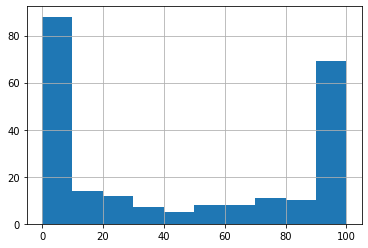

In [ ]:
df1.loc[df1['age'] > mean_age, 'happy'].hist()

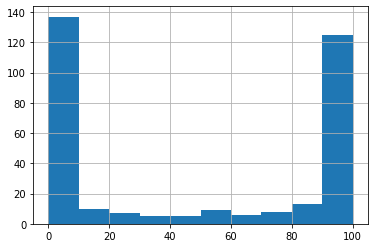

In [ ]:
df1.loc[df1['age'] <= mean_age, 'happy'].hist()

# **Гипотеза 2**

**Женщины более счастливы, чем мужчины.** 

Делаем все тоже самое как и в первой гипотезе, меняем только группы. 


In [ ]:
w_mean = df1.loc[df1['gender'] == 'Woman', 'happy'].mean()
m_mean = df1.loc[df1['gender'] == 'Man', 'happy'].mean()

print(f'Average happines percenatge for women = {w_mean}\nAverage happines percenatge for men ={m_mean}\n')


tstat, pval = ttest_ind(
    df1.loc[df1['gender'] == 'Woman', 'happy'],
    df1.loc[df1['gender'] == 'Man', 'happy'], equal_var = False)

print(f"T-statistics = {tstat}\nP-value ={pval}")

Average happines percenatge for women = 62.12065304608027
Average happines percenatge for men =40.09365456399587

T-statistics = 5.755338587819653
P-value =1.8237511518566075e-08


Как можно заметить p-value очень низкое, поэтому данная гипотеза имеет место быть. Также представленны графики распределения по двум группам, где заметна данная гипотеза. 

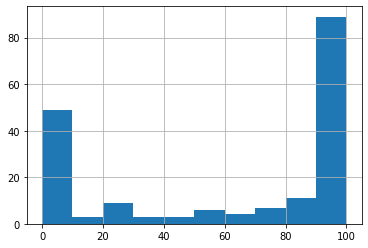

In [ ]:
df1.loc[df1['gender'] == 'Woman', 'happy'].hist()

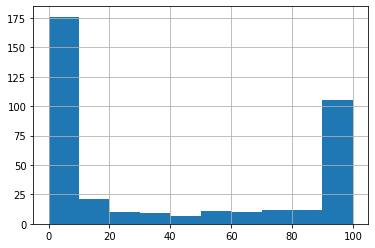

In [ ]:
df1.loc[df1['gender'] == 'Man', 'happy'].hist()

# **Гипотеза 3**
**Основная эмоция у людей на фотографиях – это счастье.**

Чтобы ответить на данный вопрос воспользуемся методом доверительных интервалов. Для этого пропишем спецаильную функцию и найдем интервалы для каждой из эмоций. 


In [ ]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h


Можно сделать вывод, что счастье самая вероятная эмоция. Также мы видим, никакая другая эмоция не попадает в интервал "счастья", поэтому гипотеза состоятельна. 

In [40]:
emotions = ['happy', 'angry', 'disgust', 'fear', 'sad', 'surprise']
mean_emotions = [df1[x].mean() for x in emotions]

for emotion in emotions:
  m, h = mean_confidence_interval(df1[emotion])
  print(f"emotion = {emotion}, probability = {m:.2f} ± {h:.2f}")



emotion = happy, probability = 47.37 ± 3.65
emotion = angry, probability = 7.89 ± 1.58
emotion = disgust, probability = 0.72 ± 0.46
emotion = fear, probability = 8.46 ± 1.60
emotion = sad, probability = 15.07 ± 2.16
emotion = surprise, probability = 1.40 ± 0.67


Графическое представление данных:

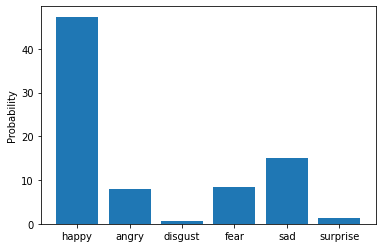

In [42]:
plt.bar(emotions, mean_emotions)
plt.ylabel("Probability")
plt.show()

# **Доверительный интервал**

Последним заданием сравним доверительные интервалы роста для мужчин и женщин. Как видим доверительный интервал у мужчин уже. Это связано с тем, что количество мужчин выше. 



In [38]:
genders = ['Man', 'Woman']

for gender in genders:
  m, h = mean_confidence_interval(df1.loc[df1['gender'] == gender, 'age'])
  print(f"gender = {gender}, mean = {m:.2f} ± {h:.2f}, count = {len(df1.loc[df1['gender'] == gender])}")


gender = Man, mean = 31.99 ± 0.72, count = 373
gender = Woman, mean = 32.51 ± 0.99, count = 184
